In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv(r"C:\Users\javier.sdiaz\Proyecto ML_2025\data\processed\datos_procesados.csv", sep=",")
df

,Temp_amb,Dir_viento,Vel_viento,Energia,Potencia,Oil_Temp,cosPhi,Frecuencia,Temp_int,Q,Año,Estacion,Rad_prom,HeatsinkTemp_prom,Idc_total,V_total,Minuto_sin,Hora_sin,Dia_sin,Mes_sin
0,11.346512,222.558422,2.611367,26.931747,0.0,26.079072,0.0,49.960499,20.329768,0.0,2022,1,0.0,17.075259,0.0,1146.307697,0.000000e+00,0.000000,0.781831,5.000000e-01
1,11.300000,223.087589,2.582713,0.000000,0.0,25.479083,0.0,49.959999,20.179770,0.0,2022,1,0.0,16.883596,0.0,1147.522942,1.000000e+00,0.000000,0.781831,5.000000e-01
2,11.306667,224.893609,2.640629,0.000000,0.0,24.879095,0.0,49.959999,20.029773,0.0,2022,1,0.0,16.691933,0.0,1150.385870,5.665539e-16,0.000000,0.781831,5.000000e-01
3,11.293333,223.534547,2.808005,0.000000,0.0,24.279182,0.0,49.959999,19.879776,0.0,2022,1,0.0,16.506316,0.0,1153.091744,-1.000000e+00,0.000000,0.781831,5.000000e-01
4,11.259853,230.927235,3.147298,0.000000,0.0,23.745968,0.0,49.960503,19.741495,0.0,2022,1,0.0,16.404334,0.0,1150.639247,0.000000e+00,0.258819,0.781831,5.000000e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105211,4.145149,223.663976,5.285611,740.750000,0.0,8.529718,0.0,50.000000,10.085310,0.0,2024,1,0.0,7.151938,0.0,1145.415732,-1.000000e+00,-0.500000,0.433884,-2.449294e-16
105212,4.245148,219.700928,5.490529,740.750000,0.0,8.329723,0.0,50.000000,10.117952,0.0,2024,1,0.0,7.165451,0.0,1145.233798,0.000000e+00,-0.258819,0.433884,-2.449294e-16
105213,4.376957,222.824833,5.048825,740.750000,0.0,8.329723,0.0,50.000000,10.117952,0.0,2024,1,0.0,7.165451,0.0,1145.233798,1.000000e+00,-0.258819,0.433884,-2.449294e-16
105214,4.493333,220.484426,4.876356,740.750000,0.0,8.329723,0.0,50.000000,10.117952,0.0,2024,1,0.0,7.165451,0.0,1145.233798,5.665539e-16,-0.258819,0.433884,-2.449294e-16


In [12]:
# Suponiendo que ya tienes un DataFrame llamado df
df["Radiacion_clase"] = (df["Rad_prom"] > 100).astype(int)


In [13]:
# Contar la cantidad de ocurrencias de cada clase en la variable objetivo
print(df["Radiacion_clase"].value_counts())


Radiacion_clase
0    70733
1    34483
Name: count, dtype: int64


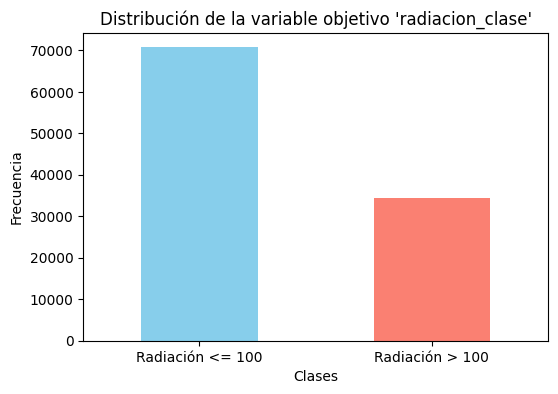

In [14]:
import matplotlib.pyplot as plt

# Graficar la distribución de las clases
plt.figure(figsize=(6, 4))
df["Radiacion_clase"].value_counts().plot(kind="bar", color=["skyblue", "salmon"])
plt.title("Distribución de la variable objetivo 'radiacion_clase'")
plt.xlabel("Clases")
plt.ylabel("Frecuencia")
plt.xticks(ticks=[0, 1], labels=["Radiación <= 100", "Radiación > 100"], rotation=0)
plt.show()


In [15]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Definir las características (X) y el objetivo (y)
X = df.drop(columns=["Radiacion_clase",])  # Excluir la columna 'radiacion_clase' para X
y = df["Radiacion_clase"]  # La columna objetivo es 'radiacion_clase'



# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Entrenar el modelo XGBoost para clasificación
model_xgb = xgb.XGBClassifier(objective="binary:logistic", n_estimators=100, max_depth=6)
model_xgb.fit(X_train, y_train)

# Predicciones
y_pred = model_xgb.predict(X_test)

# Evaluación
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy de XGBoost: {accuracy}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(conf_matrix)


Accuracy de XGBoost: 0.9999049610340239
Matriz de confusión:
[[14250     0]
 [    2  6792]]


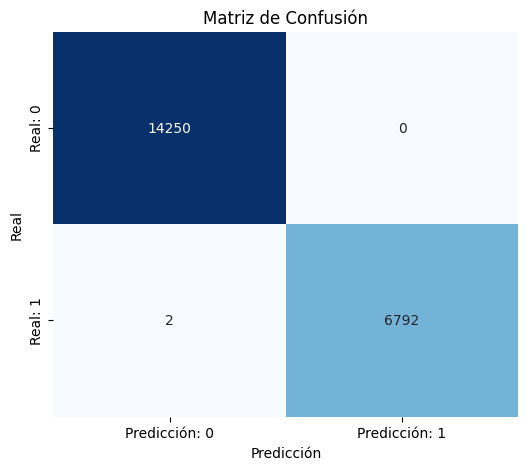

In [16]:
# Graficar la matriz de confusión con Seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicción: 0", "Predicción: 1"],
            yticklabels=["Real: 0", "Real: 1"])
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Calcular las métricas
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Imprimir las métricas
print(f"Precisión: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")




Precisión: 1.0000
Recall: 0.9997
F1-Score: 0.9999
AUC-ROC: 0.9999
